# Анализ данных о продажах игра для интернет-магазина «Стримчик» 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
#импортируем библиотеки для работы
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
from numpy import nan
from tqdm import tqdm
import warnings
from scipy.stats import pearsonr

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

In [2]:
#читаем файл
try:
    data = pd.read_csv('C:/Users/MiPro/Desktop/python/python/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')    

## Шаг 2. Подготовьте данные

* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей.  Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [3]:
#посмотрим на данные
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Первоначальный анализ данных показал, что необходимо заменить название столбцов. По возможности поставить пропуски.


In [4]:
#переименуем столбцы
data.rename(columns = {'Name' : 'name', 'Platform' : 'platform', 'Year_of_Release' : 'year_of_release', 
                    'Genre' : 'genre', 'NA_sales' : 'na_sales', 'EU_sales' : 'eu_sales', 
                     'JP_sales' : 'jp_sales', 'Other_sales' : 'other_sales', 'Critic_Score' : 'critic_score', 
                     'Rating' : 'rating', 'User_Score' : 'user_score'                   
                    }, inplace = True)

Привели названия столбцов к удобному виду.

In [5]:
#немного есть ошибки в именнах, поправили. регистр менять нет смысла
unique_name = data.sort_values('name')['name'].unique()
for i in unique_name:
    print(i)

for i in range(len(data['name'])):
    if data.loc[i,'name'] == ' Beyblade Burst':
        data.loc[i,'name'] = 'Beyblade Burst'
    if data.loc[i,'name'] == ' Fire Emblem Fates':
        data.loc[i,'name'] = 'Fire Emblem Fates'
    if data.loc[i,'name'] == " Frozen: Olaf's Quest":
        data.loc[i,'name'] = "Frozen: Olaf's Quest"
    if data.loc[i,'name'] == ' Haikyu!! Cross Team Match!':
        data.loc[i,'name'] = 'Haikyu!! Cross Team Match!'
    if data.loc[i,'name'] == ' Tales of Xillia 2':
        data.loc[i,'name'] = 'Tales of Xillia 2'
    if data.loc[i,'name'] == "'98 Koshien":
        data.loc[i,'name'] = '98 Koshien'


 Beyblade Burst
 Fire Emblem Fates
 Frozen: Olaf's Quest
 Haikyu!! Cross Team Match!
 Tales of Xillia 2
'98 Koshien
.hack//G.U. Vol.1//Rebirth
.hack//G.U. Vol.2//Reminisce
.hack//G.U. Vol.2//Reminisce (jp sales)
.hack//G.U. Vol.3//Redemption
.hack//Infection Part 1
.hack//Link
.hack//Mutation Part 2
.hack//Outbreak Part 3
.hack//Quarantine Part 4: The Final Chapter
.hack: Sekai no Mukou ni + Versus
007 Racing
007: Quantum of Solace
007: The World is not Enough
007: Tomorrow Never Dies
1 vs. 100
1/2 Summer +
10 Minute Solution
100 All-Time Favorites
100 Classic Books
100 Classic Games
1000 Cooking Recipes from ELLE à table
1001 Touch Games
101-in-1 Explosive Megamix
101-in-1 Party Megamix Wii
101-in-1 Sports Megamix
101-in-1 Sports Party Megamix
1080°: TenEighty Snowboarding
11eyes: CrossOver
12-Sai. Honto no Kimochi
12-Sai. Koisuru Diary
12Riven: The Psi-Climinal of Integral
15 Days
1701 A.D.
18 Wheeler: American Pro Trucker
18 Wheels of Steel: Extreme Trucker
18 Wheels of Steel: Extre

F.E.A.R. Perseus Mandate
F/A-18F Super Hornet
F1 2000
F1 2001
F1 2002
F1 2009
F1 2010
F1 2011
F1 2012
F1 2013
F1 2014
F1 2015
F1 2016 (Codemasters)
F1 Career Challenge
F1 Challenge
F1 Championship Season 2000
F1 Pole Position 64
F1 ROC: Race of Champions
F1 Race
F1 Race Stars
F1 Racing Championship
FIFA 06 Soccer
FIFA 06: Road to FIFA World Cup
FIFA 12
FIFA 14
FIFA 15
FIFA 16
FIFA 17
FIFA 2000
FIFA 2001 Major League Soccer
FIFA 2001: Major League Soccer
FIFA 99
FIFA Manager 12
FIFA Soccer
FIFA Soccer 06
FIFA Soccer 07
FIFA Soccer 08
FIFA Soccer 09
FIFA Soccer 09 All-Play
FIFA Soccer 10
FIFA Soccer 11
FIFA Soccer 13
FIFA Soccer 2002
FIFA Soccer 2003
FIFA Soccer 2003 (weekly jp sales)
FIFA Soccer 2004
FIFA Soccer 2005
FIFA Soccer 64
FIFA Soccer 96
FIFA Soccer 97
FIFA Soccer World Championship
FIFA Street
FIFA Street 2
FIFA Street 3
FIFA World Cup Germany 2006
FIFA World Cup: Germany 2006
FIFA: Road to  World Cup 98
FIFA: Road to World Cup 98
Fab 5 Soccer
FabStyle
Fable
Fable II
Fable III

MTV Sports: Pure Ride
MTX Mototrax
MVP 06 NCAA Baseball
MVP Baseball
MVP Baseball 2003
MVP Baseball 2004
MVP Baseball 2005
MX 2002 Featuring Ricky Carmichael
MX SuperFly featuring Ricky Carmichael
MX Unleashed
MX World Tour Featuring Jamie Little
MX vs. ATV Reflex
MX vs. ATV Supercross
MX vs. ATV Supercross Encore
MX vs. ATV Unleashed
MX vs. ATV Unleashed: On the Edge
MX vs. ATV Untamed
MX vs. ATV: Alive
MXGP 2
MXRider
Mace Griffin: Bounty Hunter
Mace: The Dark Age
Machi-Ing Maker 3 x Tousouchuu
Machi-ing Maker 4
Machi: Unmei no Kousaten
Machinarium
Machine Head
Macross 30: Ginga o Tsunagu Utagoe
Macross ? Scramble
Macross Ace Frontier
Macross Digital Mission VF-X
Macross Triangle Frontier
Macross Ultimate Frontier
Mad Dash Racing
Mad Dog McCree: Gunslinger Pack
Mad Maestro!
Mad Max (2015)
MadWorld
Madagascar
Madagascar: Escape 2 Africa
Madagascar: Operation Penguin
Madden Football 64
Madden NFL 06
Madden NFL 07
Madden NFL 08
Madden NFL 09
Madden NFL 09 All-Play
Madden NFL 10
Madden NF

Resident Evil Outbreak File #2
Resident Evil Zero
Resident Evil: Dead Aim
Resident Evil: Deadly Silence
Resident Evil: Operation Raccoon City
Resident Evil: Outbreak
Resident Evil: Revelations
Resident Evil: Revelations 2
Resident Evil: Survivor
Resident Evil: The Darkside Chronicles
Resident Evil: The Mercenaries 3D
Resident Evil: The Umbrella Chronicles
Resident Evil: Umbrella Corps
Resistance 2
Resistance 3
Resistance Dual Pack
Resistance: Burning Skies
Resistance: Fall of Man
Resistance: Retribution
Resonance of Fate
Retro Atari Classics
Retro Game Challenge
Retro Game Challenge (US sales)
Return Fire
Return to Castle Wolfenstein: Operation Resurrection
Return to Castle Wolfenstein: Tides of War
Return to PopoloCrois: A Story of Seasons Fairytale
Reversal Challenge
Revolution X
Revolution: 25th Anniversary Collection
Rewrite
Rez
Rhapsody: A Musical Adventure
Rhythm Heaven
Rhythm Heaven: The Best+
Rhythm Tengoku
Rhythm Thief & the Emperor's Treasure
Ribbit King
Richard Burns Rally
R

Wacky Races: Crash & Dash
Wacky World of Sports
Wade Hixton's Counter Punch
Wakeboarding Unleashed Featuring Shaun Murray
Walk it Out!
Wall-E
Wallace & Gromit in Project Zoo
Wallace & Gromit: Curse of the Were-Rabbit
Walt Disney Pictures Presents Enchanted
Walt Disney Pictures Presents: The Wild
Walt Disney World Quest: Magical Racing Tour
Walt Disney's The Jungle Book: Rhythm N'Groove
Wand of Fortune
Wand of Fortune 2 FD: Kimi ni Sasageru Epilogue
Wand of Fortune 2: Jikuu ni Shizumu Mokushiroku
Wand of Fortune Portable
Wand of Fortune R
Wand of Fortune: Mirai e no Prologue
Wand of Fortune: Mirai e no Prologue Portable
Wangan Midnight
Wangan Midnight Portable
Wantame Fortune Channel
Wantame Music Channel: Doko Demo Style
Wanted: Weapons of Fate
Wappy Dog
War Gods
War Leaders: Clash of Nations
War for the Overworld
War of the Monsters
WarCraft II: The Dark Saga
WarJetz
WarTech: Senko no Ronde
Warcraft II: Tides of Darkness
Warcraft III: Reign of Chaos
Warcraft III: The Frozen Throne
War

Некоторые названия игр были написаны начиная с пробела или с кавычек. Исправили

In [6]:
data[data.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Проверка показала, что в таблице нет дубликатов

In [7]:
#посмотрим что за переменные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрели тип столбцов. У всех стоит приемлемый тип, кроме оценки пользователей

In [8]:
print(data.sort_values('platform')['platform'].unique())
print(data.sort_values('year_of_release')['year_of_release'].unique())
print(data.sort_values('genre')['genre'].unique())
print(data.sort_values('critic_score')['critic_score'].unique())
print(data.sort_values('user_score')['user_score'].unique())
print(data.sort_values('rating')['rating'].unique())

['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy' nan]
[13. 17. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88.
 89. 90. 91. 92. 93. 94. 95. 96. 97. 98. nan]
['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1'

Посмотрели уникальные значения, нареканий нет кроме tbd в оценке пользователей. По всей видимости это означает, что оценка еще не стоит и в процессе подсчета. уберем это значение

In [9]:
for i in range(len(data['name'])):
    if data.loc[i,'user_score'] == 'tbd':
        data.loc[i,'user_score'] = np.nan
data = data.astype({'user_score': float}, errors = 'ignore')

Убрали tbd

In [10]:
data = data.dropna(subset=['name'])
data = data.reset_index(drop=True)

Две строки были без названия игр. По всей видимости их лучше удалить. Так как не представляется возможным востановить название игр


In [11]:
nan_data = data.pivot_table(index='name', aggfunc='median')

nan_data['rating'] = np.nan
m=0
for i in tqdm(data['name']):
    if (pd.isna(data.loc[m,'rating'])) == False:
        nan_data.loc[i,'rating'] = data.loc[m,'rating']
    m += 1
    
#nan_data['name'] = nan_data.index
#nan_data = nan_data.reset_index(drop=True)
                

100%|█████████████████████████████████████████████████████████████████████████| 16713/16713 [00:01<00:00, 15240.24it/s]


Поскольку рейтинг игры остается одинаковым все зависимости от платформы. Найдем для каждой игры рейтинг и занесем в таблицу. Для заполнения остальных данных таких как год и оценки мы используем медианы и тоже занесем их в таблицу.

In [12]:
nan_data.head(10)

,critic_score,eu_sales,jp_sales,na_sales,other_sales,user_score,year_of_release,rating
name,,,,,,,,
.hack//G.U. Vol.1//Rebirth,NaN,0.00,0.17,0.00,0.00,NaN,2006.0,NaN
.hack//G.U. Vol.2//Reminisce,NaN,0.09,0.00,0.11,0.03,NaN,2006.0,NaN
.hack//G.U. Vol.2//Reminisce (jp sales),NaN,0.00,0.16,0.00,0.00,NaN,2006.0,NaN
.hack//G.U. Vol.3//Redemption,NaN,0.00,0.17,0.00,0.00,NaN,2007.0,NaN
.hack//Infection Part 1,75.0,0.38,0.26,0.49,0.13,8.5,2002.0,T
.hack//Link,NaN,0.00,0.14,0.00,0.00,NaN,2010.0,NaN
.hack//Mutation Part 2,76.0,0.18,0.20,0.23,0.06,8.9,2002.0,T
.hack//Outbreak Part 3,70.0,0.11,0.17,0.14,0.04,8.7,2002.0,T
.hack//Quarantine Part 4: The Final Chapter,NaN,0.07,0.00,0.09,0.02,NaN,2003.0,NaN


In [13]:
m = 0
for i in tqdm(data['name']):
    if pd.isna(data.loc[m,'year_of_release']) == True:
        data.loc[m,'year_of_release'] = nan_data.loc[i,'year_of_release']
    #123 замен пропусков годе релиза
    if pd.isna(data.loc[m,'critic_score']) == True:
        data.loc[m,'critic_score'] = nan_data.loc[i,'critic_score']
    #0 замены пропусков в оценке критиков
    if pd.isna(data.loc[m,'user_score']) == True:
        data.loc[m,'user_score'] = nan_data.loc[i,'user_score'] 
    #1099 замены пропусков в оценке пользователей
#    if pd.isna(data.loc[m,'rating']) == True:
#        data.loc[m,'rating'] = nan_data.loc[i,'rating']
    #437 замены пропусков в рейтинге
    m += 1

#Некторые года получились дробные, поправим
for i in range(len(data['year_of_release'])):
    if pd.isna(data.loc[i,'year_of_release']) == False:
        data.loc[i,'year_of_release'] = int(data.loc[i,'year_of_release'])
        


100%|██████████████████████████████████████████████████████████████████████████| 16713/16713 [00:02<00:00, 7439.74it/s]


Заменили 123 пропуска в годе релиза
Оценки критиков заменить не получилось
 
Первоначально заменили 1099 оценок пользователей. Но потом отказался от этой идеи так, как это может повлиять на проверку гипотезы о различии средней оценки от платформы и жанра. Поэтому, лучше не искажать данные. 

Заменили 437 пропусков в рейтинге


In [14]:
for i in range(len(data['year_of_release'])):
    data.loc[i,'total_sales'] = data.loc[i,'na_sales'] + \
    data.loc[i,'eu_sales'] + data.loc[i,'jp_sales'] + \
    data.loc[i,'other_sales']

Добавили в данные столбец с общими продажами


## Шаг 3. Проведите исследовательский анализ данных

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

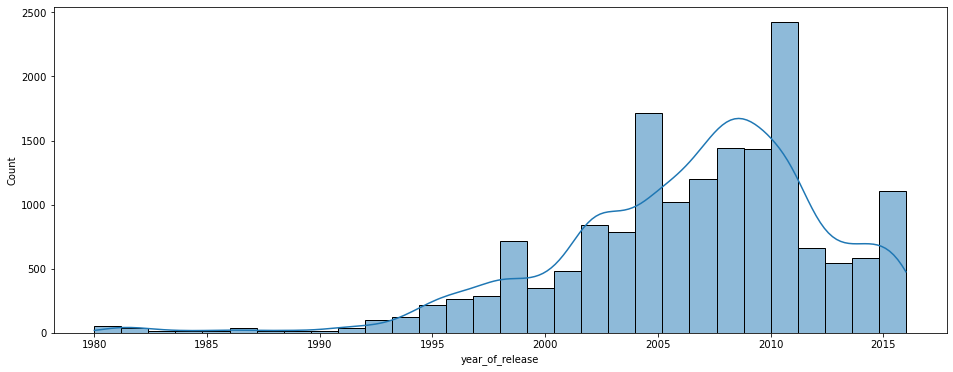

In [15]:
plt.figure(figsize=(16, 6))
sns.histplot(data=data, x="year_of_release", kde=True, bins=30);

На приведенной гистограмме видно, что с 1980 по 1990 выпускалось крайне мало игр. Затем после 1995 наблюдался рост, который достиг пика в 2011 году. затем наступил спад количества выпускаемых игр. Поскольку в 2016 году данные не точные в расчет мы их брать не будем. Так же нет смысла брать сильно старые данные. Для анализа современных тенденция я думаю будет достаточно периода в 10 лет. Но с начала проведён анализ сколько примерно живут разные игровые платформы

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance

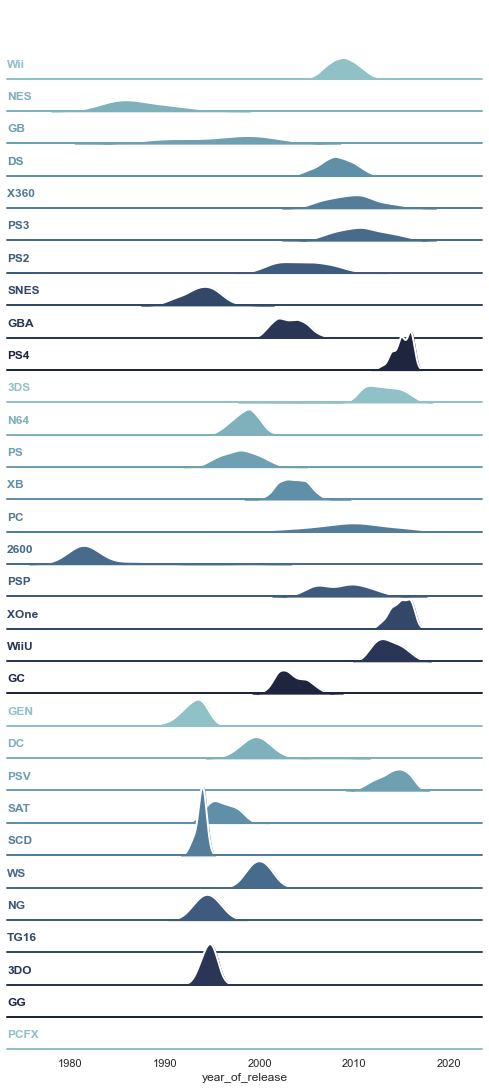

In [16]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data, row="platform", hue="platform", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "year_of_release",
      bw_adjust=1.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "year_of_release", clip_on=False, color="w", lw=2, bw_adjust=1.5)

# passing color=None to refline() uses the hue mapping

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "year_of_release")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.55)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True);

#чтобы ворнинги убрать

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)


На представленном графике видно, что обычно игры на платформу выпускают в течении 3-5 лет. Пик выпуска игр находится обычно посередине. 


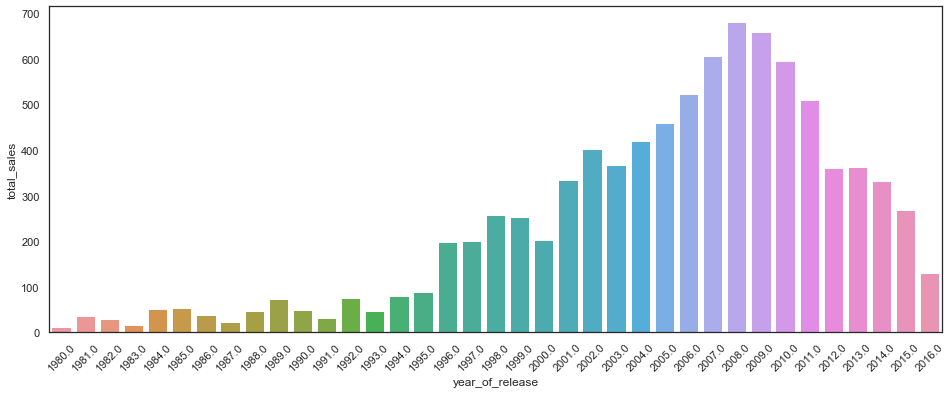

In [17]:
sales_data = data.groupby('year_of_release').agg({'total_sales':'sum'})
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.barplot(data=sales_data, x=sales_data.index, y="total_sales");


Общие продажи имели похожее распределение с количеством выпускаемых игр. Но максимум продаж наблюдался в 2008 году, затем наступило снижение продаж. и в 2015 году оно достигла уровня 2000-х годов.


In [18]:
good_data = data.loc[0:2,:] 
m=0
for i in range(len(data['year_of_release'])):
    if (data.loc[i, 'year_of_release'] > 2005) and (data.loc[i, 'year_of_release'] < 2016):
        good_data.loc[m,:] = data.loc[i,:] 
        m += 1


C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_10464\3530697615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data.loc[m,:] = data.loc[i,:]


Исходя из анализа представленных графиков представляется лучшим вариантом взять период в 10 лет. Для того чтобы проанализировать какие платформы будут на пике подъема, а какие уже будут уходить с рынка

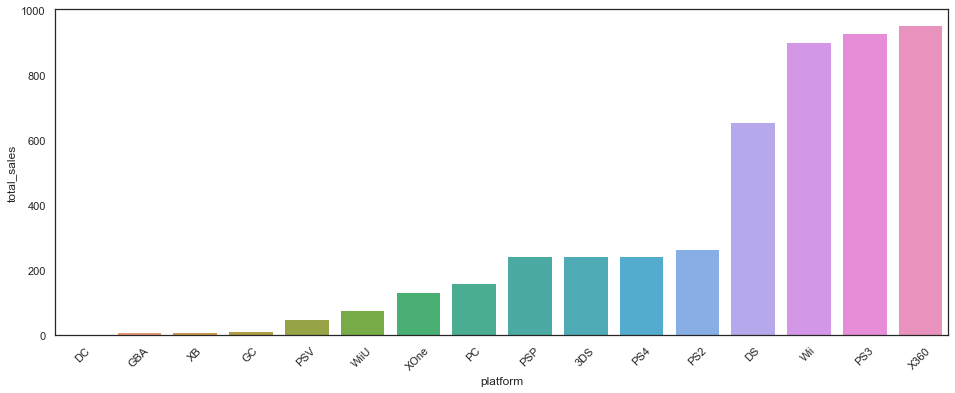

In [19]:
sales_data = good_data.groupby('platform').agg({'total_sales':'sum'})
sales_data = sales_data.sort_values('total_sales')
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.barplot(data=sales_data, x=sales_data.index, y="total_sales");

На графике видно, что некоторые игровые платформы имеют очень незначительную долю рынка и не будут нести полезной информации. Исключим все игровые платформы которые имеют общие продажи за предыдущие 10 лет меньше 50 миллионов копий

In [20]:
drop_list = []
good_data2 = good_data.loc[0:3,:] 
for i in sales_data.index:
    if sales_data.loc[i,'total_sales'] > 50:
        drop_list.append(i)
m=0
for i in range(len(good_data['platform'])):
    if good_data.loc[i, 'platform'] in drop_list:
        good_data2.loc[m,:] = good_data.loc[i,:] 
        m += 1

C:\Users\KarimovDO\AppData\Local\Temp\ipykernel_10464\1825591864.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data2.loc[m,:] = good_data.loc[i,:]


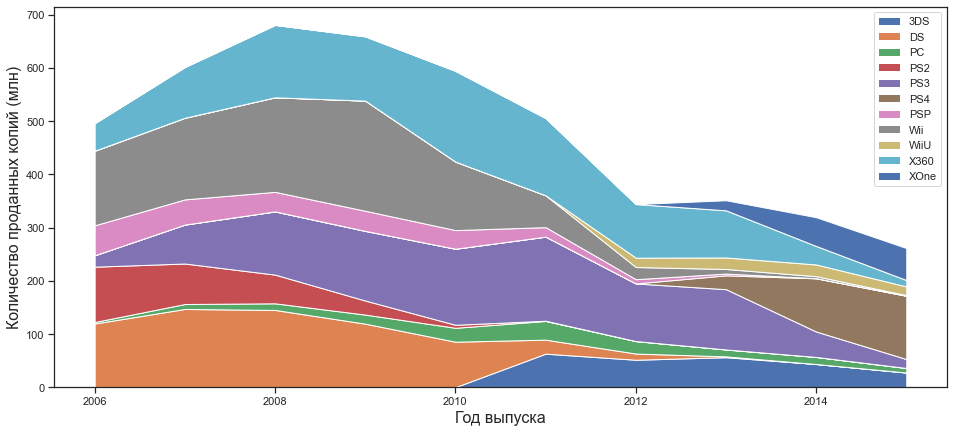

In [21]:
sns.set_theme(style="ticks")
platform_data = good_data2.pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc='sum')
platform_data = platform_data.fillna(0)
platform_data 
plt.figure(figsize=(16, 7))
y = np.vstack([platform_data['3DS'], platform_data['DS'], platform_data['PC'], 
               platform_data['PS2'], platform_data['PS3'], platform_data['PS4'], platform_data['PSP'], 
               platform_data['Wii'], platform_data['WiiU'], platform_data['X360'], platform_data['XOne']])

plt.stackplot(platform_data.index, y, labels=['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'WiiU',
                                              'X360', 'XOne'])
plt.legend(loc='upper right')
plt.xlabel("Год выпуска", size=16);
plt.ylabel("Количество проданных копий (млн)", size=16);
plt.show()


Из представленного графика видно, что такие платформы, как DS, PS2, PSP, Wii, уже ушли с рынка и их продажи в 2015 равны 0. часть платформ уже пережили пик своего развития и строить на них перспективные планы не стоит (x360, PS3). Ряд консолей только начали подъем (3DS, WiiU, PS4, XOne). И только PC сохраняет стабильную долю рынка. Что объясняется возможностью апгрейда персонального компьютера. Небольшое же количество копий скорее всего объясняется тем, что продажи игр производятся более постепенно. На новую консоль же стараются портировать как новые, так и старые игры поэтому продажи резко растут.

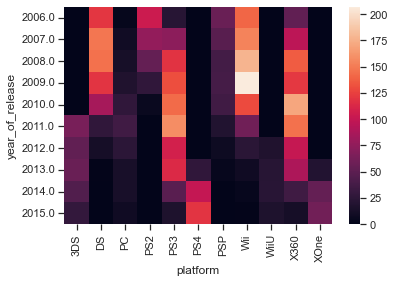

In [22]:
sns.heatmap(platform_data);

На графике хорошо визуализировано , что средняя продолжительность жизни консоли около 5-7 лет по продажам.


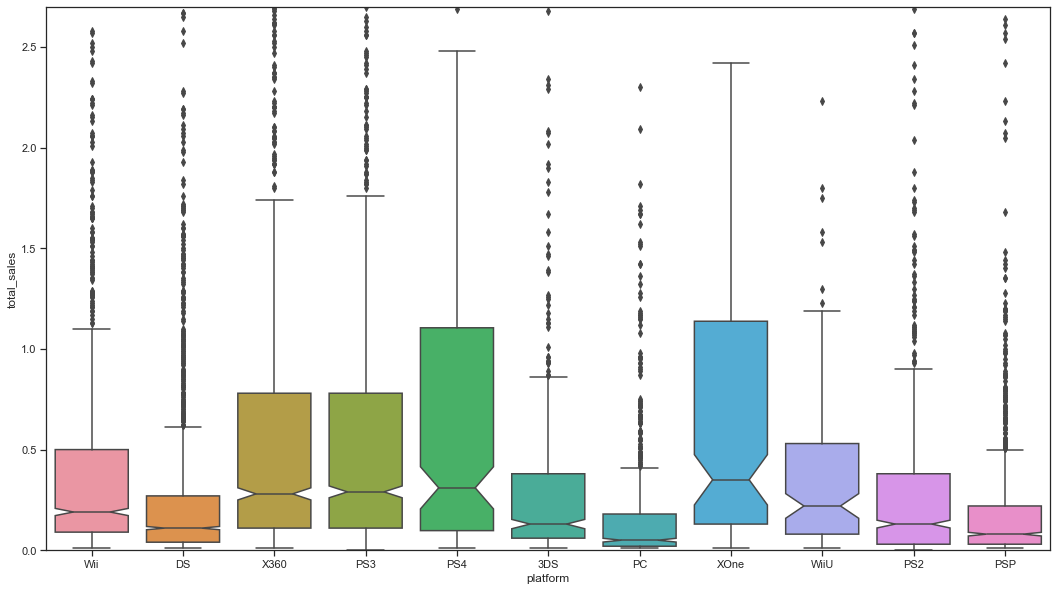

In [23]:
fig, ax1 = plt.subplots(figsize=(18, 10))
g = sns.boxplot(y=good_data2['total_sales'], x=good_data2['platform'], data=good_data2, ax=ax1, notch=True);
g.set(ylim=(0, 2.7));

Анализ количества проданных копий в зависимости от платформы безусловно показал разницу в продажах. На графике видно лидеров рынка это Play Stayshion и Xbox в разных версиях. Несколько меньше продается Wii. Такие платформы как DS, PC и PSP имеют меньше продаж и по всей видимости являются нишевыми продуктами. Для дальнейшего анализа возьмем новые развивающиеся платформы и персональный компьютер. '3DS', 'PC', 'PS4', 'WiiU', 'XOne'


In [24]:
drop_list = ['3DS', 'PC', 'PS4', 'WiiU', 'XOne']
good_data3 = good_data2.loc[0:3,['platform','total_sales', 'user_score', 'critic_score', 'na_sales', 'eu_sales',
                                 'jp_sales','other_sales']] 
m=0
for i in range(len(good_data2['platform'])):
    if good_data2.loc[i, 'platform'] in drop_list:
        good_data3.loc[m,:] = good_data2.loc[i,:] 
        m += 1

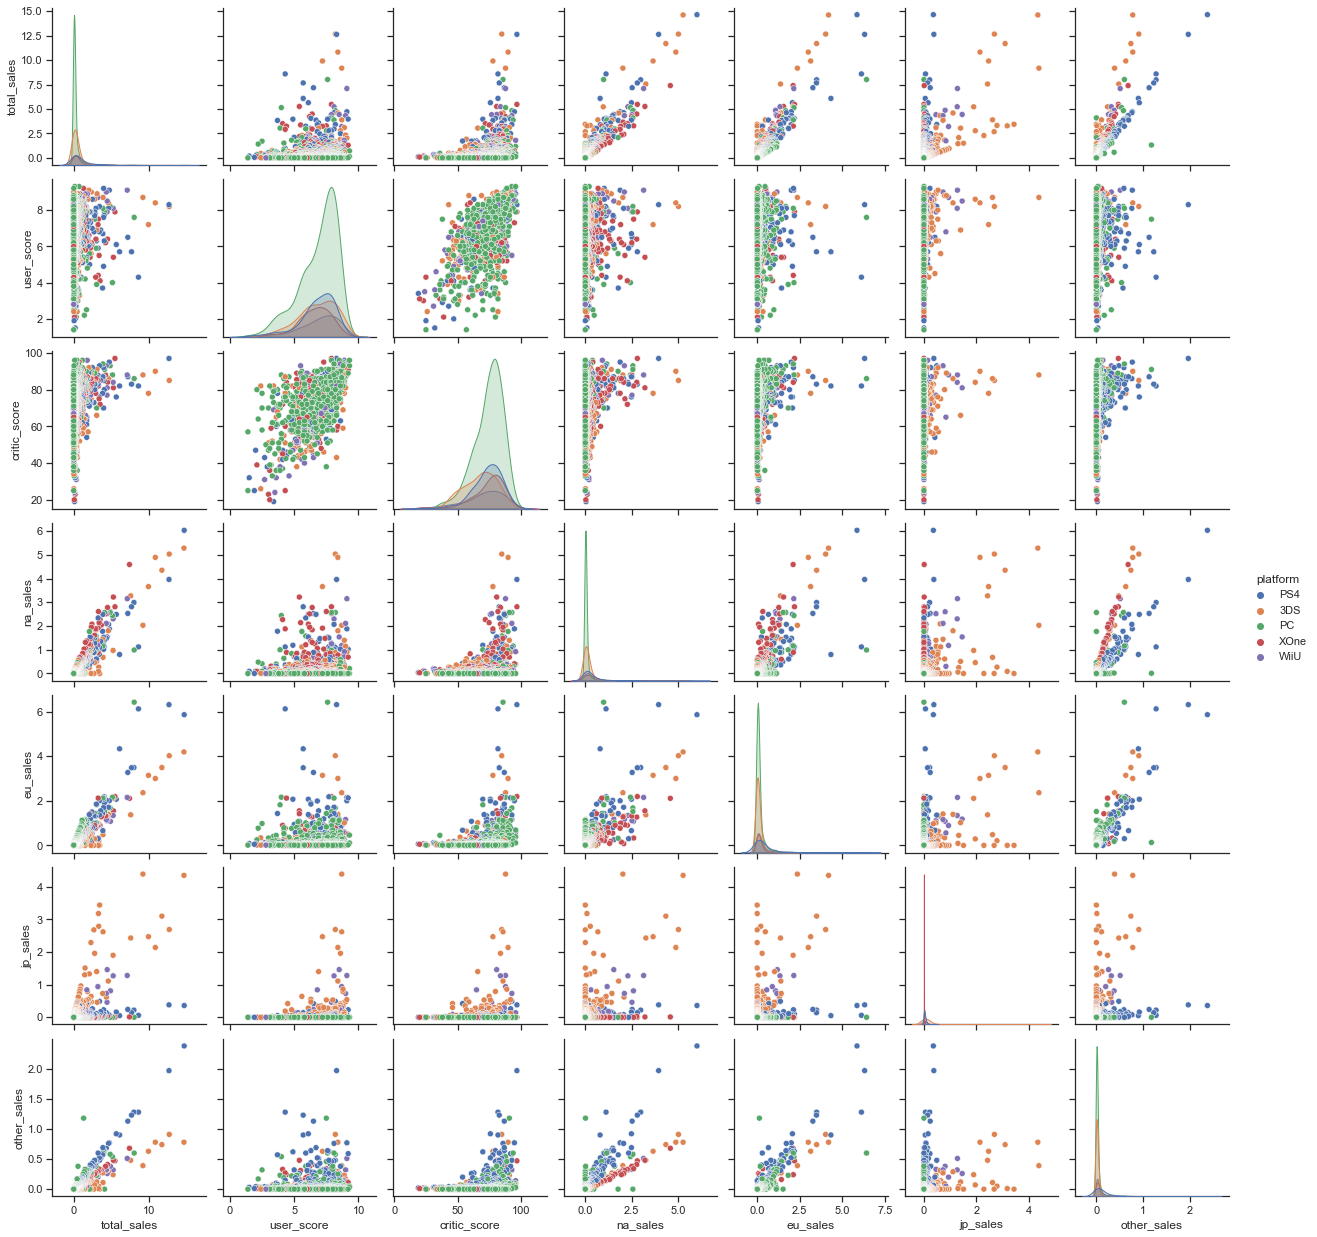

In [25]:
sns.set_theme(style="ticks")

sns.pairplot(good_data3, hue="platform");

Анализ распределения показывает , что есть некоторая зависимость продаж от оценки пользователей и критиков. Изучим данные более подробно.


Коэффициент корреляции 3DS: 0.33, статистическая значимость: 0.0


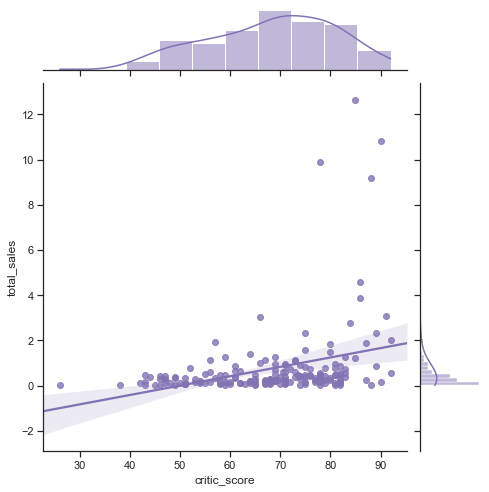

In [26]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == '3DS']
sns.jointplot(y="total_sales", x="critic_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="m", height=7);
corr, p = pearsonr(good_data4['critic_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции 3DS: {round(corr, 2)}, статистическая значимость: {round(p,3)}')


Наблюдается не сильная, но статистически значимая корреляция оценки критиков и количеством проданных копий на платформе 3DS


Коэффициент корреляции PC: 0.29, статистическая значимость: 0.0


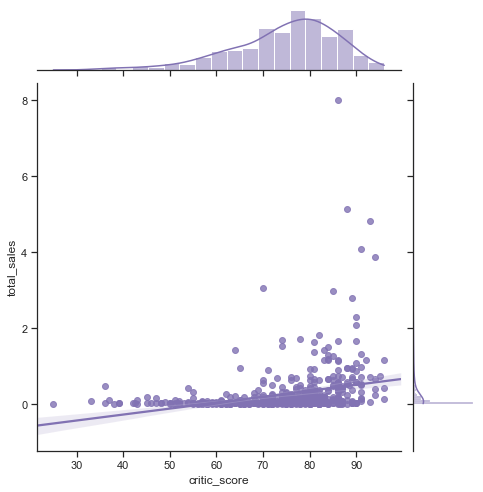

In [27]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'PC']
sns.jointplot(y="total_sales", x="critic_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="m", height=7);
corr, p = pearsonr(good_data4['critic_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции PC: {round(corr, 2)}, статистическая значимость: {round(p,3)}')

Зависимость продаж от оценки критиков на персональных компьютерах была меньше коэффициент корреляции составил всего 0,29. Но был статистически значим


Коэффициент корреляции PS4: 0.4, статистическая значимость: 0.0


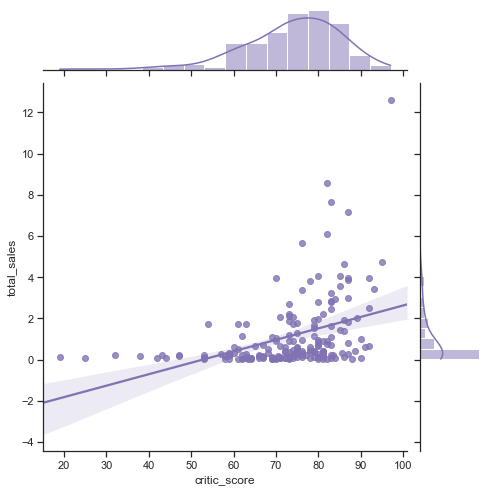

In [28]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'PS4']
sns.jointplot(y="total_sales", x="critic_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="m", height=7);
corr, p = pearsonr(good_data4['critic_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции PS4: {round(corr, 2)}, статистическая значимость: {round(p,3)}')

Оценки критиков Сильнее влияли на платформе PS4


Коэффициент корреляции WiiU: 0.33, статистическая значимость: 0.001


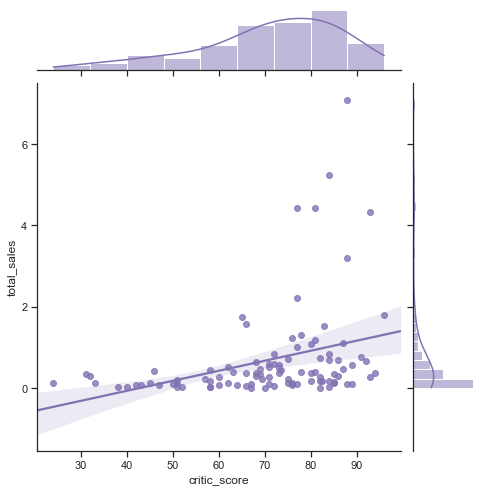

In [29]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'WiiU']
sns.jointplot(y="total_sales", x="critic_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="m", height=7);
corr, p = pearsonr(good_data4['critic_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции WiiU: {round(corr, 2)}, статистическая значимость: {round(p,3)}')

на платформе Wiiu корреляция была на уровне 3DS


Коэффициент корреляции XOne: 0.38, статистическая значимость: 0.0


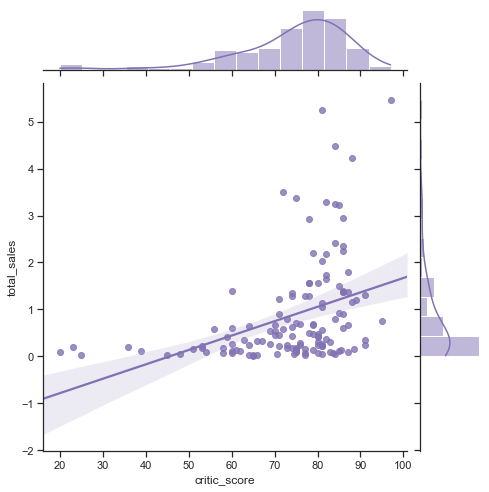

In [30]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'XOne']
sns.jointplot(y="total_sales", x="critic_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="m", height=7);
corr, p = pearsonr(good_data4['critic_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции XOne: {round(corr, 2)}, статистическая значимость: {round(p,3)}')

Так же неплохой результат показал анализ зависимости продаж от оценки критиков на платформе XOne

Коэффициент корреляции 3DS: 0.24, статистическая значимость: 0.001


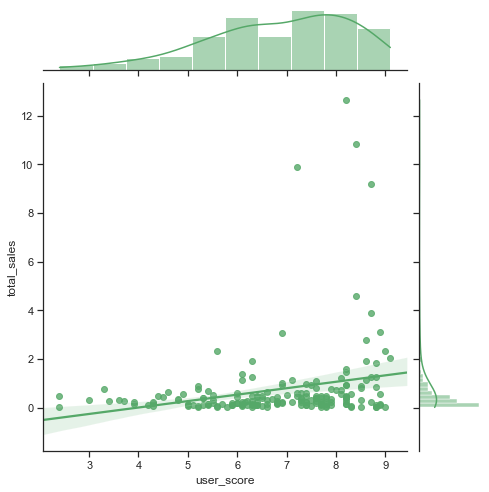

In [31]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == '3DS']
sns.jointplot(y="total_sales", x="user_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="g", height=7);
corr, p = pearsonr(good_data4['user_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции 3DS: {round(corr, 2)}, статистическая значимость: {round(p,3)}')


Как видно из представленного графика, оценки пользователей влияли меньше на продажи игры на платформе 3DS


Коэффициент корреляции PC: -0.03, статистическая значимость: 0.465


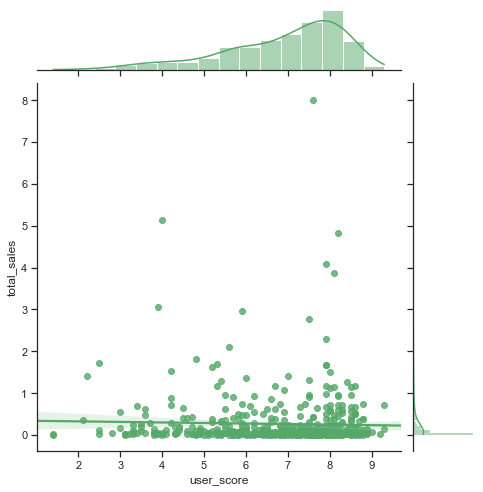

In [32]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'PC']
sns.jointplot(y="total_sales", x="user_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="g", height=7);
corr, p = pearsonr(good_data4['user_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции PC: {round(corr, 2)}, статистическая значимость: {round(p,3)}')


На продажи игр на персональный компьютер оценки пользователей не оказывали влияния. 

Коэффициент корреляции PS4: 0.02, статистическая значимость: 0.829


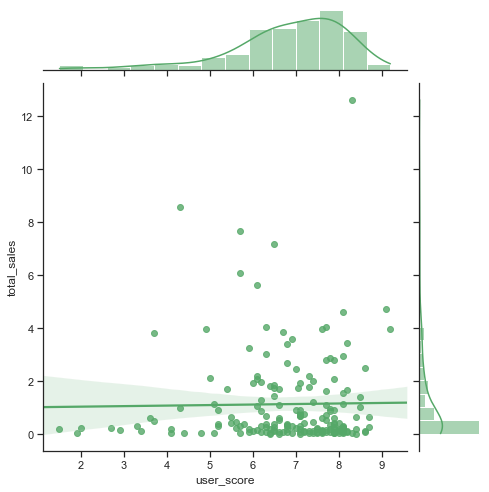

In [33]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'PS4']
sns.jointplot(y="total_sales", x="user_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="g", height=7);
corr, p = pearsonr(good_data4['user_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции PS4: {round(corr, 2)}, статистическая значимость: {round(p,3)}')


Аналогичный результат мы видим на платформе PS4. Статистически значимой зависимости нет

Коэффициент корреляции WiiU: 0.38, статистическая значимость: 0.0


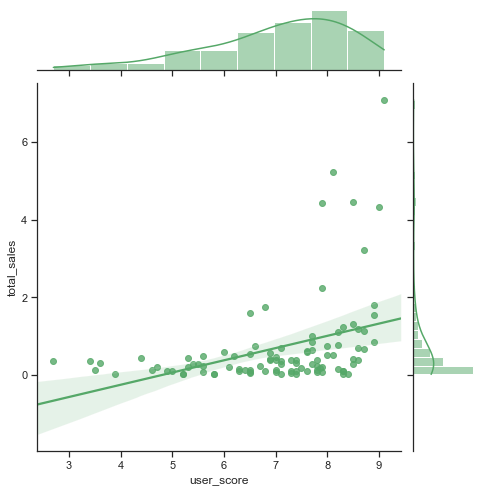

In [34]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'WiiU']
sns.jointplot(y="total_sales", x="user_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="g", height=7);
corr, p = pearsonr(good_data4['user_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции WiiU: {round(corr, 2)}, статистическая значимость: {round(p,3)}')


На платфоре WiiU вновь появилась связь объема продаж и оценки пользователей. 


Коэффициент корреляции XOne: -0.07, статистическая значимость: 0.428


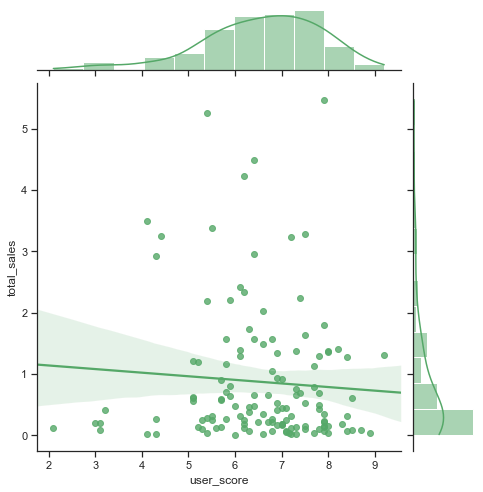

In [35]:
good_data4 = good_data3.dropna()
good_data4 = good_data4[good_data4['platform'] == 'XOne']
sns.jointplot(y="total_sales", x="user_score", data=good_data4,  
                  kind="reg", truncate=False,
                  color="g", height=7);
corr, p = pearsonr(good_data4['user_score'], good_data4['total_sales'])
print(f'Коэффициент корреляции XOne: {round(corr, 2)}, статистическая значимость: {round(p,3)}')


На платформе XOne ассоциации параметров продаж и оценки пользователей не наблюдалось


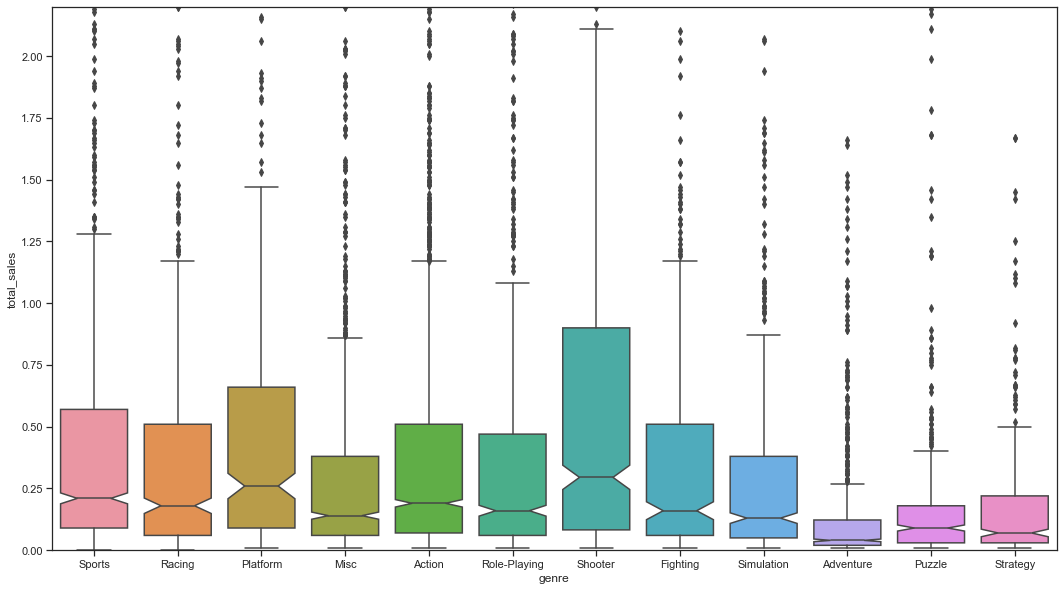

In [36]:
fig, ax1 = plt.subplots(figsize=(18, 10))
g = sns.boxplot(y=good_data2['total_sales'], x=good_data2['genre'], data=good_data2, ax=ax1, notch=True);
g.set(ylim=(0, 2.2));

Анализ показал, что наблюдаются различия в количестве проданных игр в зависимости от жанра игры


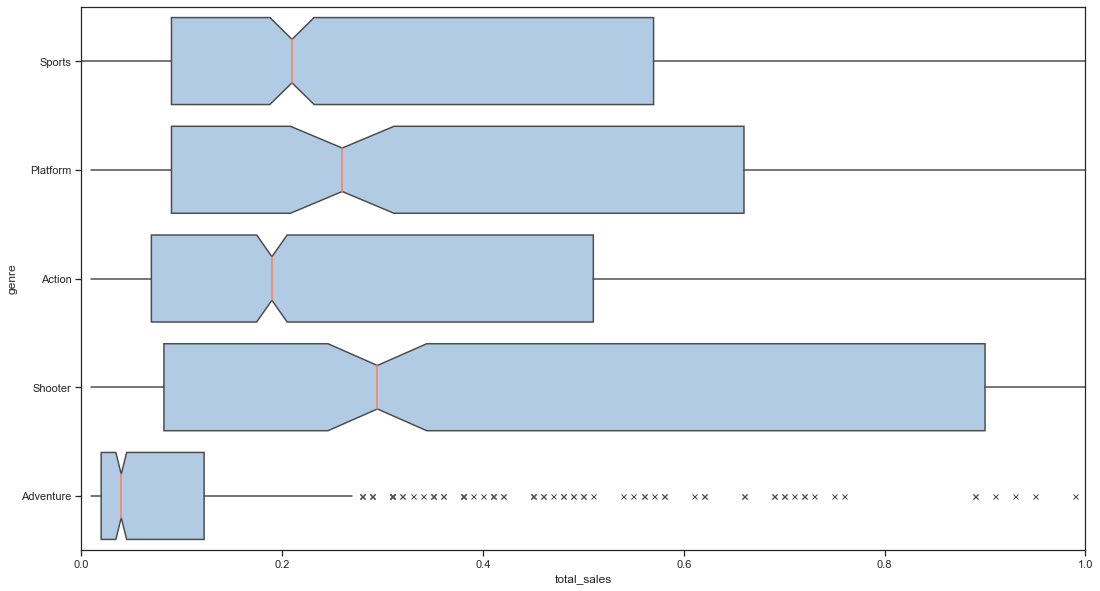

In [37]:
fig, ax1 = plt.subplots(figsize=(18, 10))
g=sns.boxplot(
    data=good_data2[(good_data2['genre'] == 'Shooter') | (good_data2['genre'] == 'Platform')
    | (good_data2['genre'] == 'Sports') | (good_data2['genre'] == 'Action') | (good_data2['genre'] == 'Adventure')], 
    x="total_sales", y="genre",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
    
)
g.set(xlim=(0,1));

Так видны успешные жанры, такие как стрелялки и спортивные игра, так и явные аутсайдеры рынка, такие как приключения. Доверительный интервал для медиан, показывает , что между некоторыми жанрами есть статистически значимые различия по объему проданных копий


## Шаг 4. Составьте портрет пользователя каждого региона
* Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

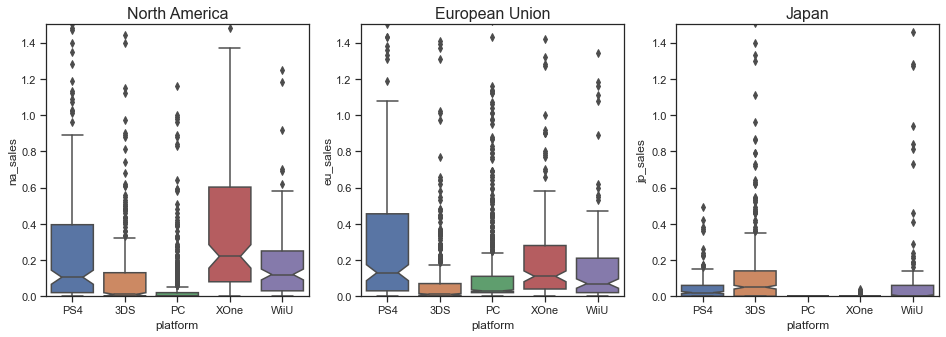

In [38]:
g = f, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

g1 = sns.boxplot(y=good_data3['na_sales'], x=good_data3['platform'], data=good_data3, ax=ax1, notch=True);
g2 = sns.boxplot(y=good_data3['eu_sales'], x=good_data3['platform'], data=good_data3, ax=ax2, notch=True);
g3 = sns.boxplot(y=good_data3['jp_sales'], x=good_data3['platform'], data=good_data3, ax=ax3, notch=True);
ax1.set_title('North America', fontsize=16)
ax2.set_title('European Union', fontsize=16)
ax3.set_title('Japan', fontsize=16)
g1.set(ylim=(0, 1.5));
g2.set(ylim=(0, 1.5));
g3.set(ylim=(0, 1.5));

Анализируя количество проданных копий в зависимости от региона мы видим , что различия есть. какие-то платформы популярнее в Японии (3DS), какие-то в Северной Америке (XOne), и в Европе (PS4). Чтобы более полноценно составить портрет пользователей в дальнейшем для анализа будем оперировать долями, так как количество проданных копий различается.

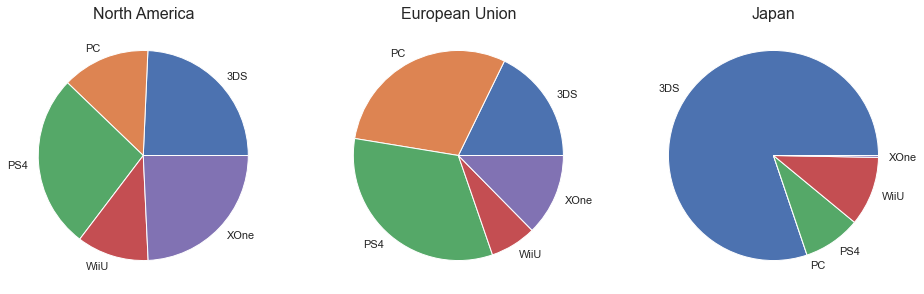

In [39]:
portret_data = good_data3.groupby(['platform'], as_index=False).agg({'na_sales': ['sum'], 'eu_sales': ['sum'], 'jp_sales': ['sum']})
portret_data.columns = ['_'.join(col).rstrip('_') for col in portret_data.columns.values]
portret_data = portret_data.fillna(0)
na_sales_sum = portret_data['na_sales_sum'].sum()
eu_sales_sum = portret_data['eu_sales_sum'].sum()
jp_sales_sum = portret_data['jp_sales_sum'].sum()
for i in range(len(portret_data['platform'])):
    portret_data.loc[i,'na_sales_share'] = portret_data.loc[i,'na_sales_sum'] /  na_sales_sum
    portret_data.loc[i,'eu_sales_share'] = portret_data.loc[i,'eu_sales_sum'] /  eu_sales_sum
    portret_data.loc[i,'jp_sales_share'] = portret_data.loc[i,'jp_sales_sum'] /  jp_sales_sum


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

# plot each pie chart in a separate subplot
ax1.pie(portret_data['na_sales_sum'], labels=portret_data['platform'])
ax2.pie(portret_data['eu_sales_sum'], labels=portret_data['platform'])
ax3.pie(portret_data['jp_sales_sum'], labels=portret_data['platform'])
ax1.set_title('North America', fontsize=16)
ax2.set_title('European Union', fontsize=16)
ax3.set_title('Japan', fontsize=16)
plt.show()

Как видно из представленных данных в Северной Америке доли продаж игр 3DS, PS4, XOne практически совпадает.
В Европе мы наблюдаем другую картину лидируют платформы PC и PS4, меньшие доли наблюдаются на 3DS и XOne.
И совершенно противоположные предпочтения наблюдаются в Японии, там лидирующие позиции наблюдаются у 3DS, зачем идет платформа WiiU. Остальные платформы имеют небольшие доли. 


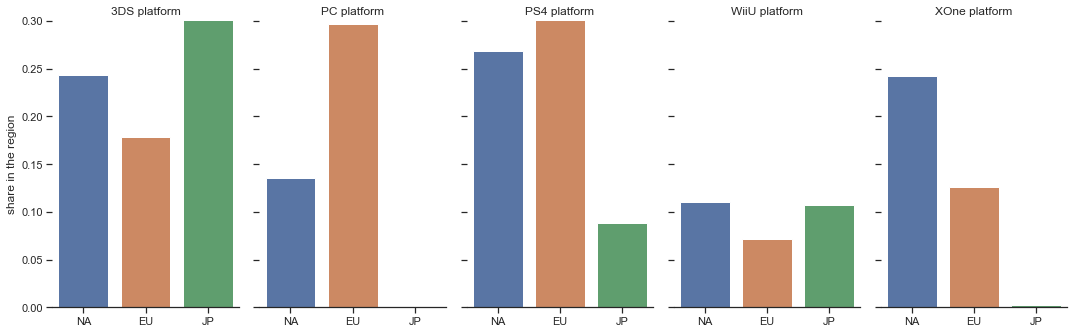

In [40]:
portret_data2 = pd.DataFrame({'platform':[''], 'share':[0],'region':['']})
m = 0

for i in range(len(portret_data['platform'])):
    portret_data2.loc[m, ['platform']] = portret_data.loc[i, 'platform']
    portret_data2.loc[m, ['share']] =  portret_data.loc[i, 'na_sales_share']
    portret_data2.loc[m, ['region']] = 'North America'    
    m +=1
    portret_data2.loc[m, ['platform']] = portret_data.loc[i, 'platform']
    portret_data2.loc[m, ['share']] = portret_data.loc[i, 'eu_sales_share']
    portret_data2.loc[m, ['region']] = 'European Union'    
    m +=1
    portret_data2.loc[m, ['platform']] = portret_data.loc[i, 'platform']
    portret_data2.loc[m, ['share']] = portret_data.loc[i, 'jp_sales_share']
    portret_data2.loc[m, ['region']] = 'Japan'    
    m +=1
        
g = sns.catplot(
    data=portret_data2, x="region", y="share", col="platform",
    kind="bar", height=5, aspect=.6, col_wrap=5, dodge=True,
)
g.set_axis_labels("", "share in the region")
g.set_xticklabels(["NA", "EU", "JP"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 0.3))
g.despine(left=True);

Сравнительный анализ отдельно показал, что 3DS занимает наибольшую долю в Японии, в Северной Америке ее доля меньше, в Европе на этой платформе играю совсем редко. 
Персональный компьютер наиболее популярен в Европе, практически в два раза снижается доля в Северной Америке. В Японии же на персональном компьютере практически не играют. 
Доли PS4 практически одинакова в Европе и Северной Америке, а в Японии она довольно не популярна. 
Платформа WiiU практически одинакова по регионам
ХOne наиболее популярен в Северной Америке, в Европе его доля уменьшается практически в два раза, а в Японии на ней практически не играют.


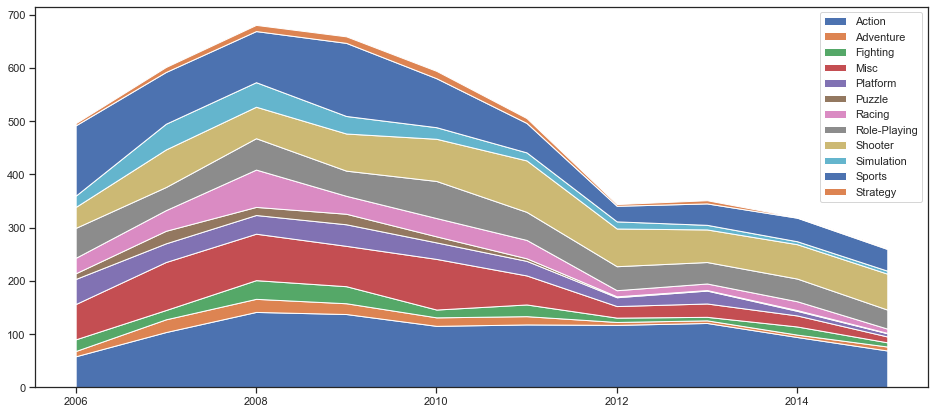

In [41]:
genre_data = good_data2.pivot_table(index='year_of_release', columns = 'genre', values = 'total_sales', aggfunc='sum')
genre_data = genre_data.fillna(0)
plt.figure(figsize=(16, 7))
y = np.vstack([genre_data['Action'], genre_data['Adventure'], genre_data['Fighting'], genre_data['Misc'],
                genre_data['Platform'], genre_data['Puzzle'], genre_data['Racing'], genre_data['Role-Playing'],
                genre_data['Shooter'], genre_data['Simulation'], genre_data['Sports'], genre_data['Strategy']])

plt.stackplot(platform_data.index, y, labels=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 
                                              'Role-Playing','Shooter', 'Simulation', 'Sports', 'Strategy'])
plt.legend(loc='upper right')
plt.show()



Для оценки доли игр по жанрам был проведен анализ распределения игр в зависимости от года. Как мы видим доля жанров практически не изменяется с годами и никакие жанры не исчезают. Из этого следует , что можно выбирать Тор-5 жанров по количеству продаж.
Было выбрано 5 жанров с наибольшими продажами: 'Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports'.


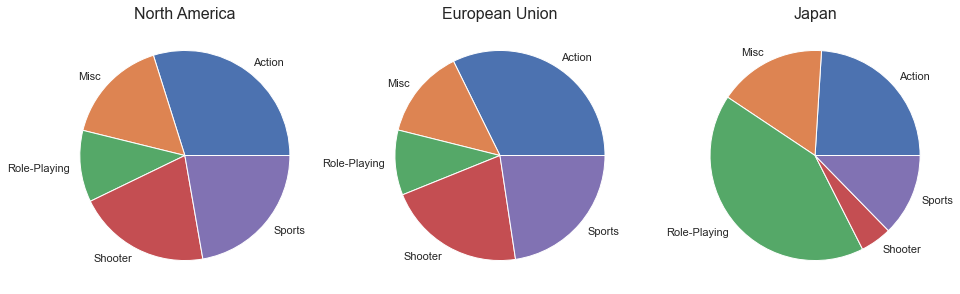

In [42]:
drop_list = ['Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports']
good_data4 = good_data2.loc[0:3,['genre','total_sales', 'user_score', 'critic_score', 'na_sales', 'eu_sales',
                                 'jp_sales','other_sales']] 
m=0
for i in range(len(good_data2['genre'])):
    if good_data2.loc[i, 'genre'] in drop_list:
        good_data4.loc[m,:] = good_data2.loc[i,:] 
        m += 1
        
genre_data2 = good_data4.groupby(['genre'], as_index=False).agg({'na_sales': ['sum'], 'eu_sales': ['sum'], 'jp_sales': ['sum']})
genre_data2.columns = ['_'.join(col).rstrip('_') for col in genre_data2.columns.values]
genre_data2 = genre_data2.fillna(0)
na_sales_sum = genre_data2['na_sales_sum'].sum()
eu_sales_sum = genre_data2['eu_sales_sum'].sum()
jp_sales_sum = genre_data2['jp_sales_sum'].sum()
for i in range(len(genre_data2['genre'])):
    genre_data2.loc[i,'na_sales_share'] = genre_data2.loc[i,'na_sales_sum'] /  na_sales_sum
    genre_data2.loc[i,'eu_sales_share'] = genre_data2.loc[i,'eu_sales_sum'] /  eu_sales_sum
    genre_data2.loc[i,'jp_sales_share'] = genre_data2.loc[i,'jp_sales_sum'] /  jp_sales_sum
    
#genre_data2 = genre_data2.loc[:,['Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports']]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

# plot each pie chart in a separate subplot
ax1.pie(genre_data2['na_sales_sum'], labels=genre_data2['genre'])
ax2.pie(genre_data2['eu_sales_sum'], labels=genre_data2['genre'])
ax3.pie(genre_data2['jp_sales_sum'], labels=genre_data2['genre'])
ax1.set_title('North America', fontsize=16)
ax2.set_title('European Union', fontsize=16)
ax3.set_title('Japan', fontsize=16)
plt.show()

Анализ распределения показал, что предпочтения геймеров в Северной Америке и Европе практически не различалось. Наиболее популярный жанр 'Action'. Затем по популярности находятся 'Shooter', 'Sports' и меньшую долю занимают 'Misc', 'Role-Playing'.
В Японии же мы наблюдали другую картину. Наиболее популярный жанр был 'Role-Playing'. Жанры 'Action', 'Misc' и 'Sports' были менее популярны. Жанр 'Shooter' был самый не популярный. 

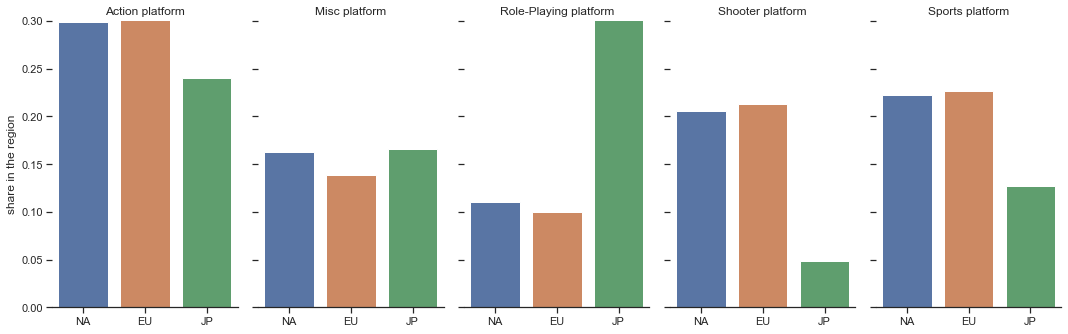

In [43]:
genre_data3 = pd.DataFrame({'genre':[''], 'share':[0],'region':['']})
m = 0

for i in range(len(portret_data['platform'])):
    genre_data3.loc[m, ['platform']] = genre_data2.loc[i, 'genre']
    genre_data3.loc[m, ['share']] =  genre_data2.loc[i, 'na_sales_share']
    genre_data3.loc[m, ['region']] = 'North America'    
    m +=1
    genre_data3.loc[m, ['platform']] = genre_data2.loc[i, 'genre']
    genre_data3.loc[m, ['share']] = genre_data2.loc[i, 'eu_sales_share']
    genre_data3.loc[m, ['region']] = 'European Union'    
    m +=1
    genre_data3.loc[m, ['platform']] = genre_data2.loc[i, 'genre']
    genre_data3.loc[m, ['share']] = genre_data2.loc[i, 'jp_sales_share']
    genre_data3.loc[m, ['region']] = 'Japan'    
    m +=1
        
g = sns.catplot(
    data=genre_data3, x="region", y="share", col="platform",
    kind="bar", height=5, aspect=.6, col_wrap=5, dodge=True,
)
g.set_axis_labels("", "share in the region")
g.set_xticklabels(["NA", "EU", "JP"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 0.3))
g.despine(left=True);

Анализ долей при прямом сравнении внутри жанров мы видим ту же картину. 


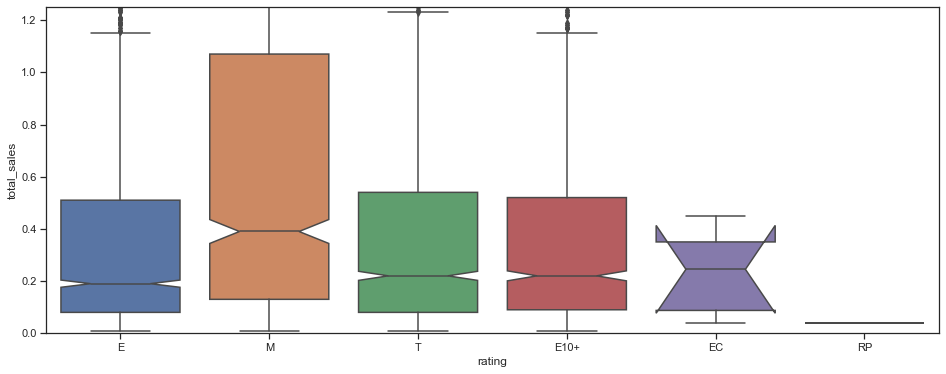

In [44]:
fig, ax1 = plt.subplots(figsize=(16, 6))
g = sns.boxplot(y=good_data['total_sales'], x=good_data['rating'], data=good_data2, ax=ax1, notch=True);
g.set(ylim=(0, 1.25));

Анализ количества продаж в зависимости от рейтинга игры, так же наблюдаются значительные различия. 


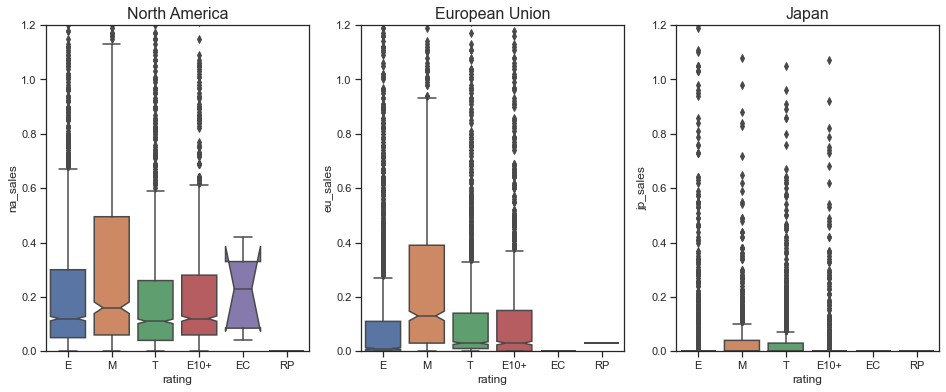

In [45]:
g = f, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

g1 = sns.boxplot(y=good_data['na_sales'], x=good_data['rating'], data=good_data, ax=ax1, notch=True);
g2 = sns.boxplot(y=good_data['eu_sales'], x=good_data['rating'], data=good_data, ax=ax2, notch=True);
g3 = sns.boxplot(y=good_data['jp_sales'], x=good_data['rating'], data=good_data, ax=ax3, notch=True);
g1.set(ylim=(0, 1.2));
g2.set(ylim=(0, 1.2));
g3.set(ylim=(0, 1.2));
ax1.set_title('North America', fontsize=16)
ax2.set_title('European Union', fontsize=16)
ax3.set_title('Japan', fontsize=16);

Поскольку доля продаж различается в разных регионах, дальнейший анализ так же будет проводится анализом долей


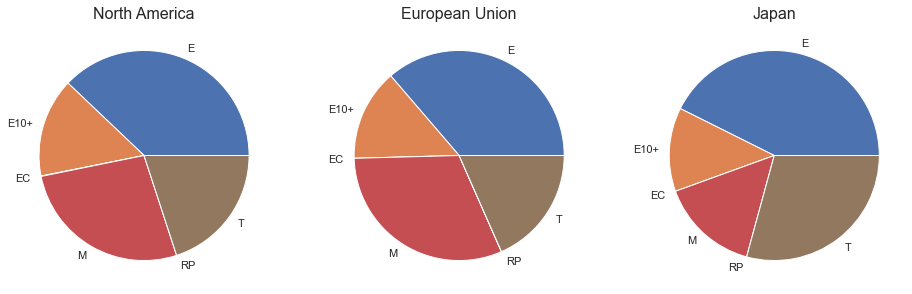

In [46]:
rating_data = good_data.groupby(['rating'], as_index=False).agg({'na_sales': ['sum'], 'eu_sales': ['sum'], 'jp_sales': ['sum']})
rating_data.columns = ['_'.join(col).rstrip('_') for col in rating_data.columns.values]
rating_data = rating_data.fillna(0)
na_sales_sum = rating_data['na_sales_sum'].sum()
eu_sales_sum = rating_data['eu_sales_sum'].sum()
jp_sales_sum = rating_data['jp_sales_sum'].sum()
for i in range(len(rating_data['rating'])):
    rating_data.loc[i,'na_sales_share'] = rating_data.loc[i,'na_sales_sum'] /  na_sales_sum
    rating_data.loc[i,'eu_sales_share'] = rating_data.loc[i,'eu_sales_sum'] /  eu_sales_sum
    rating_data.loc[i,'jp_sales_share'] = rating_data.loc[i,'jp_sales_sum'] /  jp_sales_sum

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

# plot each pie chart in a separate subplot
ax1.pie(rating_data['na_sales_sum'], labels=rating_data['rating'])
ax2.pie(rating_data['eu_sales_sum'], labels=rating_data['rating'])
ax3.pie(rating_data['jp_sales_sum'], labels=rating_data['rating'])
ax1.set_title('North America', fontsize=16)
ax2.set_title('European Union', fontsize=16)
ax3.set_title('Japan', fontsize=16)
plt.show()

Как видно из приведённого анализа различия являются не столь заметными как при анализе жанров и игровых платформ. обращает на себя внимание увеличение игр с рейтингом "Т" в Японии и уменьшение доли игр с рейтингом "М". Доли игр с другими рейтингами сильно не различаются

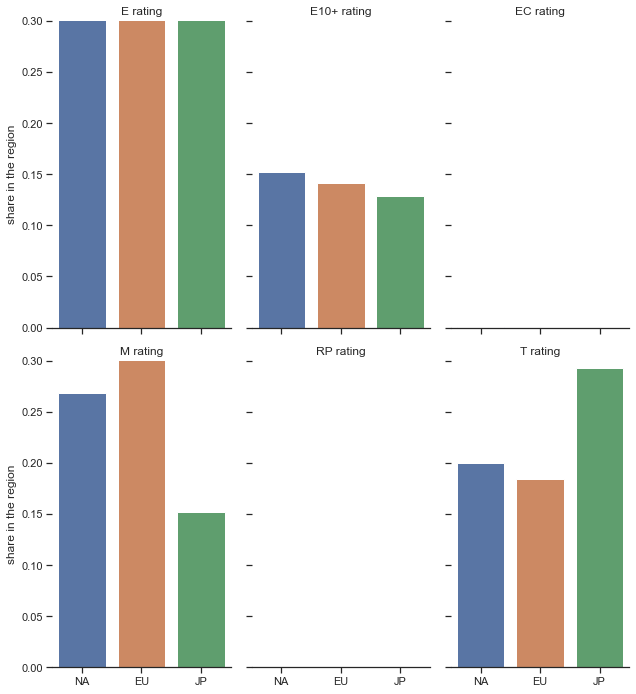

In [47]:
rating_data2 = pd.DataFrame({'rating':[''], 'share':[0],'region':['']})
m = 0

for i in range(len(rating_data['rating'])):
    rating_data2.loc[m, ['rating']] = rating_data.loc[i, 'rating']
    rating_data2.loc[m, ['share']] =  rating_data.loc[i, 'na_sales_share']
    rating_data2.loc[m, ['region']] = 'North America'    
    m +=1
    rating_data2.loc[m, ['rating']] = rating_data.loc[i, 'rating']
    rating_data2.loc[m, ['share']] = rating_data.loc[i, 'eu_sales_share']
    rating_data2.loc[m, ['region']] = 'European Union'    
    m +=1
    rating_data2.loc[m, ['rating']] = rating_data.loc[i, 'rating']
    rating_data2.loc[m, ['share']] = rating_data.loc[i, 'jp_sales_share']
    rating_data2.loc[m, ['region']] = 'Japan'    
    m +=1
        
g = sns.catplot(
    data=rating_data2, x="region", y="share", col="rating",
    kind="bar", height=5, aspect=.6, col_wrap=3, dodge=True,
)
g.set_axis_labels("", "share in the region")
g.set_xticklabels(["NA", "EU", "JP"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 0.3))
g.despine(left=True);

Аналогичную картину мы видим при группировке графиков по рейтингу. Обращает на себя внимание практически отсутствие игр с рейтингом ЕС и RP


## Шаг 5. Проверьте гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Задайте самостоятельно пороговое значение alpha.

Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

In [48]:
drop_list = ['PC', 'XOne']
gipoteza1 = good_data.loc[0:3,['platform','total_sales', 'user_score', 'critic_score', 'na_sales', 'eu_sales',
                                 'jp_sales','other_sales']] 
m=0
for i in range(len(good_data['platform'])):
    if good_data.loc[i, 'platform'] in drop_list:
        gipoteza1.loc[m,:] = good_data.loc[i,:] 
        m += 1
        
gipoteza1 = gipoteza1.dropna()

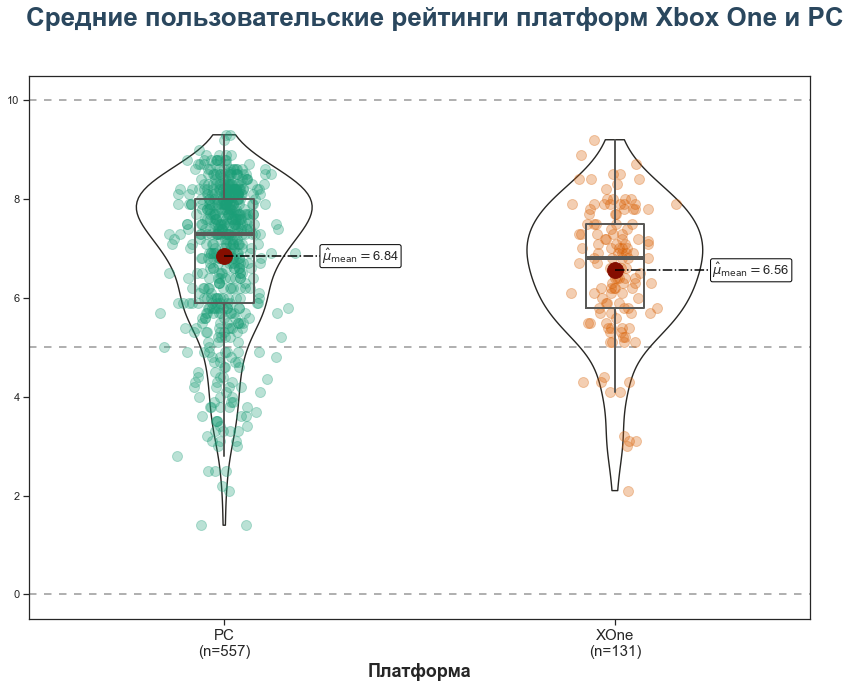

In [49]:
species = sorted(gipoteza1["platform"].unique())

y_data = [gipoteza1[gipoteza1["platform"] == specie]["user_score"].values for specie in species]

jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

BG_WHITE = "#ffffff"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#595957"
RED_DARK = "#850e00"
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3"]
POSITIONS = [0, 1]
HLINES = [0, 5, 10]

fig, ax = plt.subplots(figsize= (14, 10))
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)
    
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    
medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, 
    showcaps = False,   
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

means = [y.mean() for y in y_data]
for i, mean in enumerate(means):
    ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)
    
    ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
    ax.text(
        i + 0.25,
        mean,
        r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
        fontsize=13,
        va="center",
        bbox = dict(
            facecolor="white",
            edgecolor="black",
            boxstyle="round",
            pad=0.15
        ),
        zorder=10 # to make sure the line is on top
    )

for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 100, color=color, alpha=0.3
              )

xlabels = [f"{specie}\n(n={y_data[i].size})" for i, specie in enumerate(species)]
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
ax.set_xlabel("Платформа", size=18, weight="bold");

fig.suptitle(
    "Средние пользовательские рейтинги платформ Xbox One и PC",
    x = 0.122,
    y = 0.975,
    ha="left",
    fontsize=26,
    color=BLUE,
    weight="bold",    
);

In [50]:
results = st.ttest_ind(gipoteza1[gipoteza1['platform'] =='PC']['user_score'],
                      gipoteza1[gipoteza1['platform'] =='XOne']['user_score'],
                      equal_var=False)
print(f' t-критерий Стьюдента = {round(results.statistic,2)}, p-value = {round(results.pvalue,3)}')

 t-критерий Стьюдента = 2.19, p-value = 0.03


Статистический анализ среднего значения пользовательского рейтинга платформ Xbox One и PC показал, что различия не были статистически значимыми (t = 2.19, p-value = 0.03). Уровень статистической значимости был выбран (р=0,001). Так как выборки большие и уровень статистической значимости равный 0,05 показался недостаточным. 
Нулевая гипотеза сформулирована как: Н0: Среднее значение пользовательского рейтинга платформы Xbox One равно среднему значению пользовательского рейтинга платформы PC.
Альтернативная гипотеза: Н1: Среднее значение пользовательского рейтинга платформы Xbox One отличается от среднего значения пользовательского рейтинга платформы PC.

Анализ показал, что нулевая гипотеза не отвергнута. 

In [51]:
drop_list = ['Action', 'Sports']
gipoteza2 = good_data.loc[0:3,['genre','total_sales', 'user_score', 'critic_score', 'na_sales', 'eu_sales',
                                 'jp_sales','other_sales']] 
m=0
for i in range(len(good_data['genre'])):
    if good_data.loc[i, 'genre'] in drop_list:
        gipoteza2.loc[m,:] = good_data.loc[i,:] 
        m += 1
        
gipoteza2 = gipoteza2.dropna()

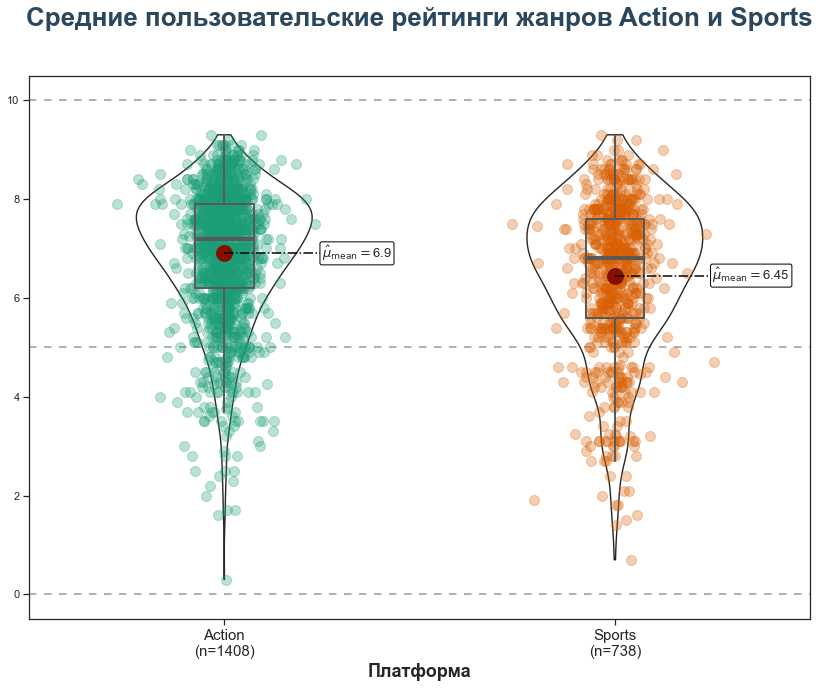

In [52]:
species = sorted(gipoteza2["genre"].unique())

y_data = [gipoteza2[gipoteza2["genre"] == specie]["user_score"].values for specie in species]

jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]

BG_WHITE = "#ffffff"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#595957"
RED_DARK = "#850e00"
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3"]
POSITIONS = [0, 1]
HLINES = [0, 5, 10]

fig, ax = plt.subplots(figsize= (14, 10))
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)
    
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    
medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, 
    showcaps = False,   
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

means = [y.mean() for y in y_data]
for i, mean in enumerate(means):
    ax.scatter(i, mean, s=250, color=RED_DARK, zorder=3)
    
    ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)
    ax.text(
        i + 0.25,
        mean,
        r"$\hat{\mu}_{\rm{mean}} = $" + str(round(mean, 2)),
        fontsize=13,
        va="center",
        bbox = dict(
            facecolor="white",
            edgecolor="black",
            boxstyle="round",
            pad=0.15
        ),
        zorder=10 # to make sure the line is on top
    )

for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s = 100, color=color, alpha=0.3
              )

xlabels = [f"{specie}\n(n={y_data[i].size})" for i, specie in enumerate(species)]
ax.set_xticks(POSITIONS)
ax.set_xticklabels(xlabels, size=15, ha="center", ma="center")
ax.set_xlabel("Платформа", size=18, weight="bold");

fig.suptitle(
    "Средние пользовательские рейтинги жанров Action и Sports",
    x = 0.122,
    y = 0.975,
    ha="left",
    fontsize=26,
    color=BLUE,
    weight="bold",    
);

In [53]:
results = st.ttest_ind(gipoteza2[gipoteza2['genre'] =='Action']['user_score'],
                      gipoteza2[gipoteza2['genre'] =='Sports']['user_score'],
                      equal_var=False)
print(f' t-критерий Стьюдента = {round(results.statistic,2)}, p-value = {round(results.pvalue,3)}')

 t-критерий Стьюдента = 6.77, p-value = 0.0


Статистический анализ среднего значения пользовательского рейтинга в зависимости от жанра Action и Sports показал, что различия  были статистически значимыми (t = 6.77, p-value = 0.0). Уровень статистической значимости был выбран (р=0,001). 

Нулевая гипотеза сформулирована как: Н0: Среднее значение пользовательского рейтинга жанра Action равно среднему значению пользовательского рейтинга жанра Sports.
Альтернативная гипотеза: Н1: Среднее значение пользовательского рейтинга жанра Action не равно среднему значению пользовательского рейтинга жанра Sports.

Анализ показал, что нулевая гипотеза отвергнута. Средняя  оценка у игры жанра Action был выше, чем у жанра Sports (6,9 и 6,45, соответственно)

## Шаг 6. Напишите общий вывод

Первоначальный анализ данных показал, что необходимо заменить название столбцов. По возможности поставить пропуски.
Привели названия столбцов к удобному виду.
Некоторые названия игр были написаны начиная с пробела или с кавычек. Исправили
Проверка показала, что в таблице нет дубликатов
Посмотрели тип столбцов. У всех стоит приемлемый тип, кроме оценки пользователей
Посмотрели уникальные значения, нареканий нет кроме tbd в оценке пользователей. По всей видимости это означает, что оценка еще не стоит и в процессе подсчета. уберем это значение
Поскольку рейтинг игры остается одинаковым все зависимости от платформы. Найдем для каждой игры рейтинг и занесем в таблицу. Для заполнения остальных данных таких как год и оценки мы используем медианы и тоже занесем их в таблицу.
Заменили 123 пропуска в годе релиза Оценки критиков заменить не получилось
Первоначально заменили 1099 оценок пользователей. Но потом отказался от этой идеи так, как это может повлиять на проверку гипотезы о различии средней оценки от платформы и жанра. Поэтому, лучше не искажать данные.
Заменили 437 пропусков в рейтинге
Добавили в данные столбец с общими продажами
На приведенной гистограмме видно, что с 1980 по 1990 выпускалось крайне мало игр. Затем после 1995 наблюдался рост, который достиг пика в 2011 году. затем наступил спад количества выпускаемых игр. Поскольку в 2016 году данные не точные в расчет мы их брать не будем. Так же нет смысла брать сильно старые данные. Для анализа современных тенденция я думаю будет достаточно периода в 10 лет. Но с начала проведён анализ сколько примерно живут разные игровые платформы
На представленном графике видно, что обычно игры на платформу выпускают в течении 3-5 лет. Пик выпуска игр находится обычно посередине.
Общие продажи имели похожее распределение с количеством выпускаемых игр. Но максимум продаж наблюдался в 2008 году, затем наступило снижение продаж. и в 2015 году оно достигла уровня 2000-х годов.
Исходя из анализа представленных графиков представляется лучшим вариантом взять период в 10 лет. Для того чтобы проанализировать какие платформы будут на пике подъема, а какие уже будут уходить с рынка
На графике видно, что некоторые игровые платформы имеют очень незначительную долю рынка и не будут нести полезной информации. Исключим все игровые платформы которые имеют общие продажи за предыдущие 10 лет меньше 50 миллионов копий
Из представленного графика видно, что такие платформы, как DS, PS2, PSP, Wii, уже ушли с рынка и их продажи в 2015 равны 0. часть платформ уже пережили пик своего развития и строить на них перспективные планы не стоит (x360, PS3). Ряд консолей только начали подъем (3DS, WiiU, PS4, XOne). И только PC сохраняет стабильную долю рынка. Что объясняется возможностью апгрейда персонального компьютера. Небольшое же количество копий скорее всего объясняется тем, что продажи игр производятся более постепенно. На новую консоль же стараются портировать как новые, так и старые игры поэтому продажи резко растут.

На графике хорошо визуализировано, что средняя продолжительность жизни консоли около 5-7 лет по продажам.
Анализ количества проданных копий в зависимости от платформы безусловно показал разницу в продажах. На графике видно лидеров рынка это Play Stayshion и Xbox в разных версиях. Несколько меньше продается Wii. Такие платформы как DS, PC и PSP имеют меньше продаж и по всей видимости являются нишевыми продуктами. Для дальнейшего анализа возьмем новые развивающиеся платформы и персональный компьютер. '3DS', 'PC', 'PS4', 'WiiU', 'XOne'
Анализ распределения показывает , что есть некоторая зависимость продаж от оценки пользователей и критиков. Изучим данные более подробно.
Наблюдается не сильная, но статистически значимая корреляция оценки критиков и количеством проданных копий на платформе 3DS
Зависимость продаж от оценки критиков на персональных компьютерах была меньше коэффициент корреляции составил всего 0,29. Но был статистически значим
Оценки критиков Сильнее влияли на платформе PS4
на платформе Wiiu корреляция была на уровне 3DS
Так же неплохой результат показал анализ зависимости продаж от оценки критиков на платформе XOne
Как видно из представленного графика, оценки пользователей влияли меньше на продажи игры на платформе 3DS
не оказывали влияния. 
На продажи игр на персональный компьютер оценки пользователей не оказывали влияния. 

Статистически значимой зависимости нет
Аналогичный результат мы видим на платформе PS4. Статистически значимой зависимости нет

вновь появилась связь объема продаж и оценки пользователей. 
На платфоре WiiU вновь появилась связь объема продаж и оценки пользователей. 

На платформе XOne ассоциации параметров продаж и оценки пользователей не наблюдалось
Анализ показал, что наблюдаются различия в количестве проданных игр в зависимости от жанра игры
Так видны успешные жанры, такие как стрелялки и спортивные игра, так и явные аутсайдеры рынка, такие как приключения. Доверительный интервал для медиан, показывает , что между некоторыми жанрами есть статистически значимые различия по объему проданных копий
Анализируя количество проданных копий в зависимости от региона мы видим , что различия есть. какие-то платформы популярнее в Японии (3DS), какие-то в Северной Америке (XOne), и в Европе (PS4). Чтобы более полноценно составить портрет пользователей в дальнейшем для анализа будем оперировать долями, так как количество проданных копий различается.
Как видно из представленных данных в Северной Америке доли продаж игр 3DS, PS4, XOne практически совпадает.
В Европе мы наблюдаем другую картину лидируют платформы PC и PS4, меньшие доли наблюдаются на 3DS и XOne.
И совершенно противоположные предпочтения наблюдаются в Японии, там лидирующие позиции наблюдаются у 3DS, зачем идет платформа WiiU. Остальные платформы имеют небольшие доли. 
Японии на ней практически не играют.
Сравнительный анализ отдельно показал, что 3DS занимает наибольшую долю в Японии, в Северной Америке ее доля меньше, в Европе на этой платформе играю совсем редко. 
Персональный компьютер наиболее популярен в Европе, практически в два раза снижается доля в Северной Америке. В Японии же на персональном компьютере практически не играют. 
Доли PS4 практически одинакова в Европе и Северной Америке, а в Японии она довольно не популярна. 
Платформа WiiU практически одинакова по регионам
ХOne наиболее популярен в Северной Америке, в Европе его доля уменьшается практически в два раза, а в Японии на ней практически не играют.
Было выбрано 5 жанров с наибольшими продажами: .
Для оценки доли игр по жанрам был проведен анализ распределения игр в зависимости от года. Как мы видим доля жанров практически не изменяется с годами и никакие жанры не исчезают. Из этого следует , что можно выбирать Тор-5 жанров по количеству продаж.
Было выбрано 5 жанров с наибольшими продажами: 'Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports'.
Анализ распределения показал, что предпочтения геймеров в Северной Америке и Европе практически не различалось. Наиболее популярный жанр 'Action'. Затем по популярности находятся 'Shooter', 'Sports' и меньшую долю занимают 'Misc', 'Role-Playing'.
В Японии же мы наблюдали другую картину. Наиболее популярный жанр был 'Role-Playing'. Жанры 'Action', 'Misc' и 'Sports' были менее популярны. Жанр 'Shooter' был самый не популярный. 
Анализ долей при прямом сравнении внутри жанров мы видим ту же картину. 
Анализ количества продаж в зависимости от рейтинга игры, так же наблюдаются значительные различия. 
Поскольку доля продаж различается в разных регионах, дальнейший анализ так же будет проводится анализом долей
Как видно из приведённого анализа различия являются не столь заметными как при анализе жанров и игровых платформ. обращает на себя внимание увеличение игр с рейтингом "Т" в Японии и уменьшение доли игр с рейтингом "М". Доли игр с другими рейтингами сильно не различаются

Аналогичную картину мы видим при группировке графиков по рейтингу. Обращает на себя внимание практически отсутствие игр с рейтингом ЕС и RP
Статистический анализ среднего значения пользовательского рейтинга платформ Xbox One и PC показал, что различия не были статистически значимыми (t = 2.19, p-value = 0.03). Уровень статистической значимости был выбран (р=0,001). Так как выборки большие и уровень статистической значимости равный 0,05 показался недостаточным. 
Нулевая гипотеза сформулирована как: Н0: Среднее значение пользовательского рейтинга платформы Xbox One равно среднему значению пользовательского рейтинга платформы PC.
Альтернативная гипотеза: Н1: Среднее значение пользовательского рейтинга платформы Xbox One отличается от среднего значения пользовательского рейтинга платформы PC.
Анализ показал, что нулевая гипотеза не отвергнута. 
Статистический анализ среднего значения пользовательского рейтинга в зависимости от жанра Action и Sports показал, что различия были статистически значимыми (t = 6.77, p-value = 0.0). Уровень статистической значимости был выбран (р=0,001).
Нулевая гипотеза сформулирована как: Н0: Среднее значение пользовательского рейтинга жанра Action равно среднему значению пользовательского рейтинга жанра Sports. Альтернативная гипотеза: Н1: Среднее значение пользовательского рейтинга жанра Action не равно среднему значению пользовательского рейтинга жанра Sports.
Анализ показал, что нулевая гипотеза отвергнута. Средняя оценка у игры жанра Action был выше, чем у жанра Sports (6,9 и 6,45, соответственно)

Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.